# Uber Trips Analysis 

By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset I’m using here is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ud=pd.read_csv(r'uber-raw-data-sep14.csv')

In [3]:
ud.shape

(1028136, 4)

In [4]:
ud.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup.

In [5]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [7]:
ud.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])

In [17]:
ud.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [10]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [16]:
ud['Day']= ud['Date/Time'].dt.day
ud['Weekday']= ud['Date/Time'].dt.weekday
ud['Hour'] = ud['Date/Time'].dt.hour

# Data Visualization

1. Analyze the Uber trips according to the Day

<Axes: xlabel='Day', ylabel='Count'>

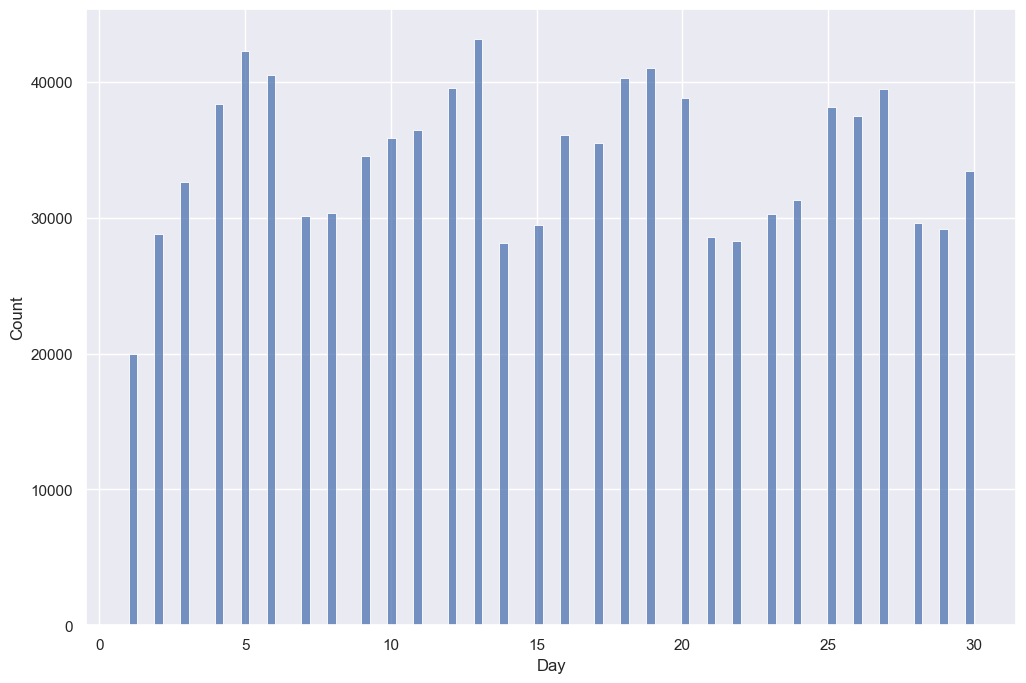

In [27]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=ud, x='Day' )

By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends

2. Analyze the Uber trips according to the hours

<Axes: xlabel='Hour', ylabel='Count'>

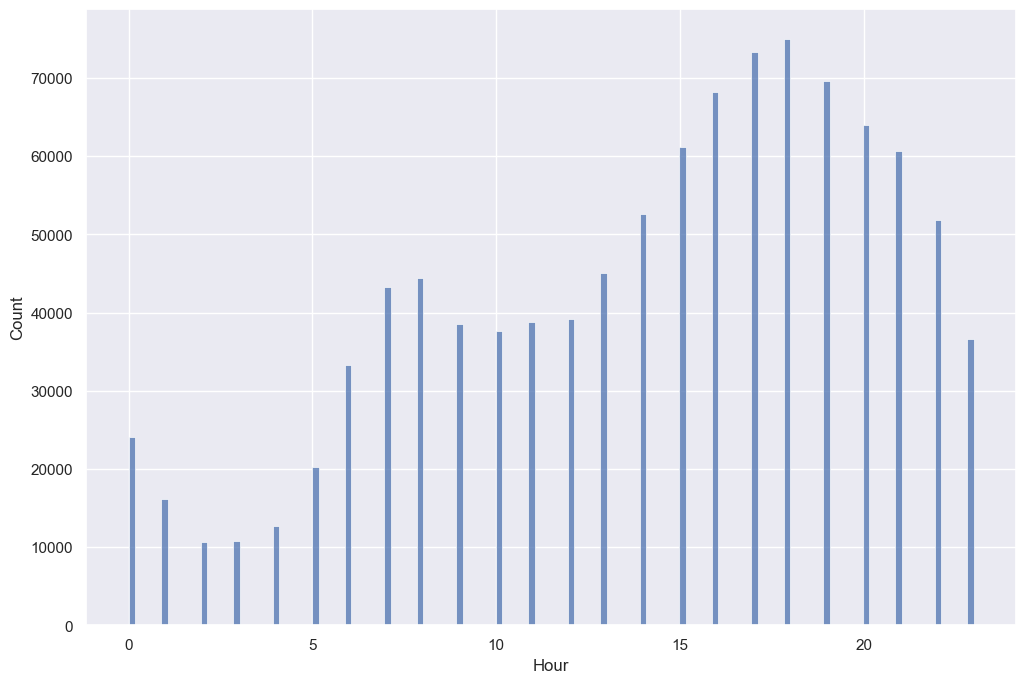

In [39]:
sns.histplot(ud['Hour'])

The Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing.

3. Analyze the Uber trips according to the weekdays

<Axes: xlabel='Weekday', ylabel='Count'>

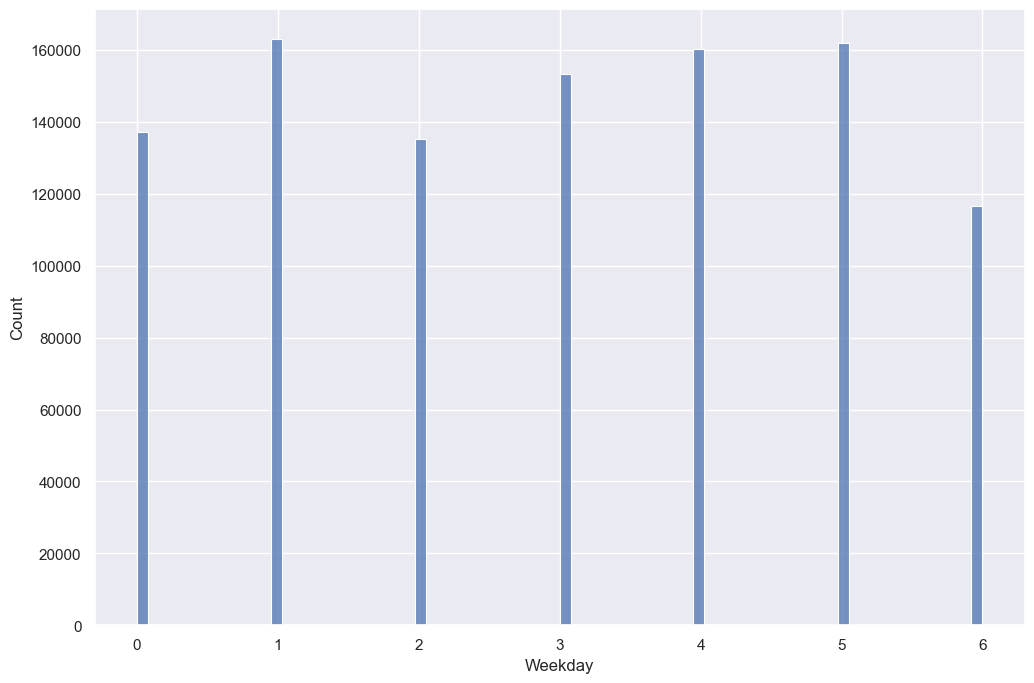

In [40]:
sns.histplot(ud['Weekday'])

In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest

4. Correlation of Weekday and Hour

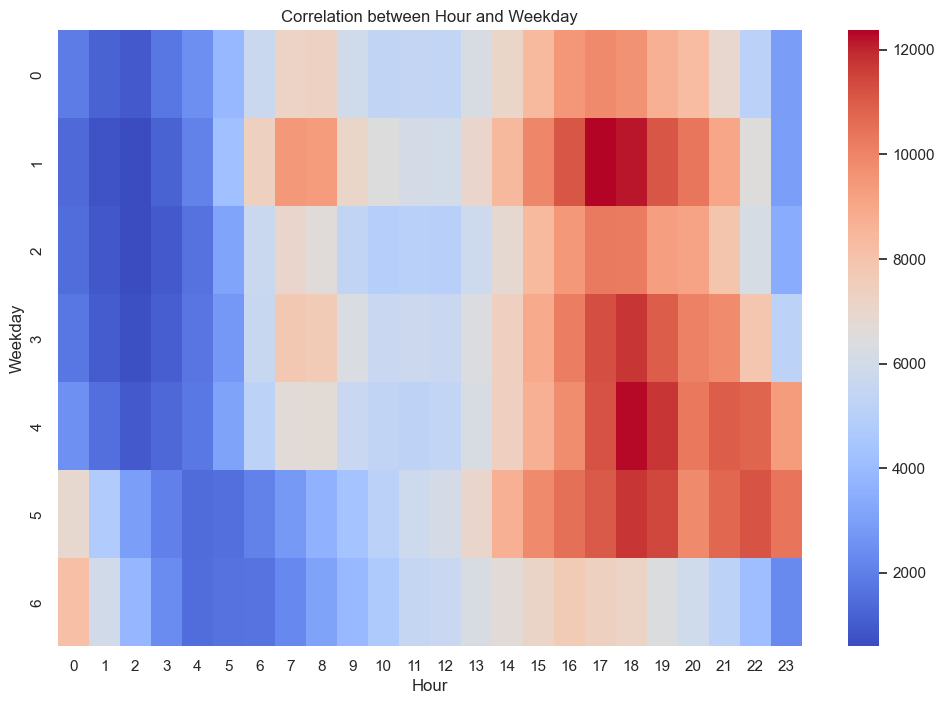

In [61]:
# Correlation of Weekday and Hour
df = ud.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))   #this applies a lambda function that calculates the length of each group
df = df.unstack()
sns.heatmap(df, annot=False, fmt='.2f', cmap='coolwarm')

plt.title('Correlation between Hour and Weekday')
plt.show()

5. As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city

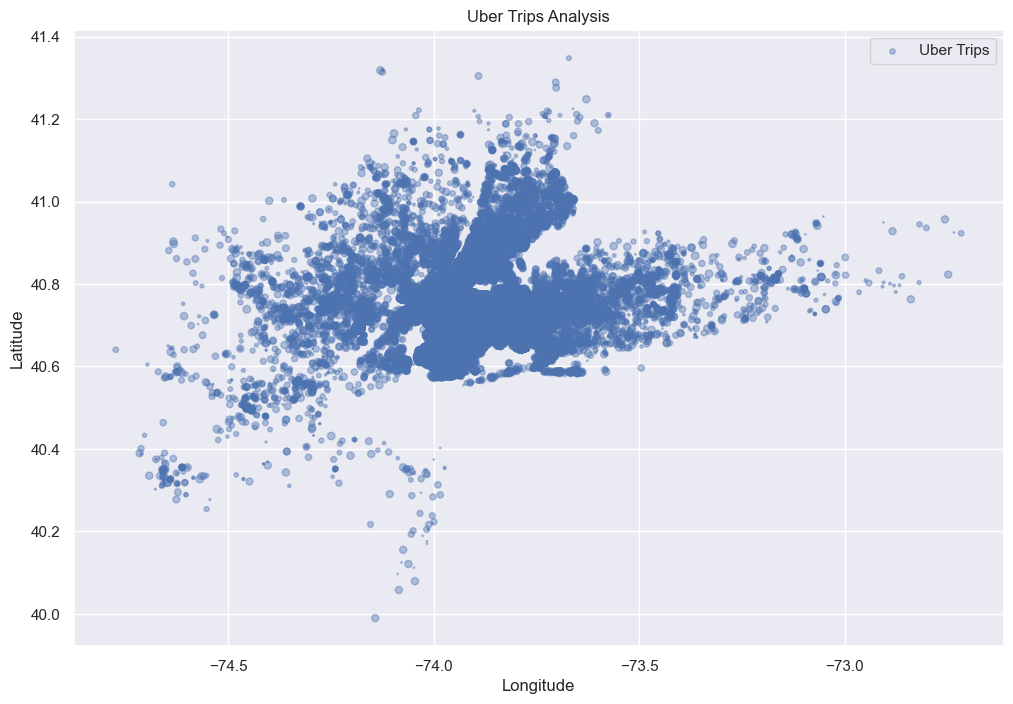

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(ud['Lon'], ud['Lat'], alpha=0.4, s=ud['Day'], label='Uber Trips')
plt.title("Uber Trips Analysis")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.show()

Summary:

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1. Monday is the most profitable day for Uber
2. On Saturdays less number of people use Uber
3. 6 pm is the busiest day for Uber
4. On average a rise in Uber trips start around 5 am.
5. Most of the Uber trips originate near the Manhattan region in New York.